# Notebook to exploring stiching a scrolling feed using OCR results

In [2]:
import sys
import cv2
import numpy as np
import pandas as pd

sys.path.insert(0, "../")
from db import HindsightDB
import utils
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [3]:
db = HindsightDB()

In [4]:
frames = db.get_frames()
frames = utils.add_datetimes(frames)
frames = frames.sort_values(by='datetime_local', ascending=False)

In [5]:
row = frames.iloc[1570]
frame_id = row['id'] # Can also insert frame_id here

In [6]:
ocr_result = db.get_ocr_results(frame_id=frame_id)
frame_total_text = utils.ocr_results_to_str(ocr_result)
im = cv2.imread(row['path'])

In [8]:
ocr_result

,id,frame_id,x,y,w,h,text,conf
0,2222890,110906,840.357525,52.097648,150.054184,35.339588,LTE A C,0.5
1,2222891,110906,146.461544,174.418604,226.666656,55.813953,reddit,0.5
2,2222892,110906,115.076935,320.930232,495.179474,38.372093,r/Futurology 5h • theguardian.com,0.5
3,2222893,110906,41.846181,394.000001,634.666626,46.000000,Microplastic discovery in penises,1.0
4,2222894,110906,38.359000,446.511629,704.410217,45.488371,raises erectile dysfunction questions,1.0
5,2222895,110906,132.512821,627.906977,62.769230,31.395348,995,1.0
6,2222896,110906,369.641024,624.000001,272.000000,42.279070,• 172 Comments,1.0
7,2222897,110906,958.974360,526.744187,83.692307,45.348835,Gilia,0.3
8,2222898,110906,941.538461,627.906978,66.256409,31.395348,224,1.0
9,2222899,110906,115.076916,752.999999,313.846161,39.000000,r/Showerthoughts 2h,0.5


In [9]:
print(frame_total_text)

Microplastic discovery in penises
raises erectile dysfunction questions
--------------------
995   • 172 Comments       224
--------------------
Any job you hate is also an acting career, because
you have to act like you want to be there
--------------------
• 288    • 32 Comments
--------------------
Can't take it anymore, thinking of selling my startup
--------------------
My startup is doing pretty well, but I'm not getting all the help I
need. My startup is mainly for record labels to track the
metrics and sales of their artists on streaming platforms. W...
--------------------
• 64 Comments        35
--------------------
B2B ads need to find audiences that matter. Enter
LinkedIn - a platform built for B2B. Drive results and
get started.
--------------------
1/2
--------------------
+
--------------------
Home   Communities    Create    Chat
--------------------



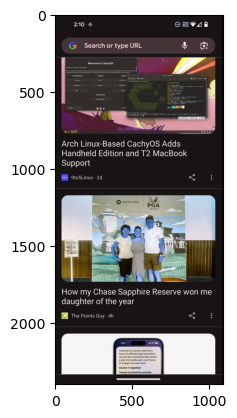

In [86]:
plt.imshow(im)